In [1]:
import pandas as pd
data = pd.read_excel('Hot 100 Audio Features.xlsx')

In [2]:
data['spotify_genre'] = data['spotify_genre'].fillna('')

In [3]:
data['spotify_genre'].head(20)

0                                     ['pop reggaeton']
1     ['arkansas country', 'contemporary country', '...
2                                  ['dance pop', 'pop']
3                     ['dfw rap', 'melodic rap', 'rap']
4        ['dfw rap', 'rap', 'southern hip hop', 'trap']
5                 ['dance pop', 'pop', 'post-teen pop']
6                                 ['nc hip hop', 'rap']
7                         ['hip hop', 'pop rap', 'rap']
8                     ['dfw rap', 'melodic rap', 'rap']
9                                                      
10                                  ['memphis hip hop']
11                ['dance pop', 'pop', 'post-teen pop']
12        ['dance pop', 'pop', 'pop rap', 'r&b', 'rap']
13                                                     
14                                              ['pop']
15                         ['k-pop', 'k-pop boy group']
16                        ['hip hop', 'pop rap', 'rap']
17                                      ['florid

In [4]:
genre_dict ={}
for x in range(len(data)):
    listfield = data.loc[x,'spotify_genre']
    result_str = ""
    for i in range(0, len(listfield)):
        if (listfield[i] != '[') and (listfield[i] != ']') and (listfield[i] != "'"):
            result_str = result_str + listfield[i]
    if len(listfield) != 0:
        listfield = result_str.split(",")
        for g in listfield:
            if g in genre_dict:
                genre_dict[g] = genre_dict[g] + 1
            else:
                genre_dict[g] = 1
#print(genre_dict)
dict_df = pd.DataFrame(list(genre_dict.items()),columns=['Genre','count'])


In [5]:
dict_df.loc[dict_df['Genre']=='','count'] = 0
dict_df.sort_values('count', ascending=False).head(10)

,Genre,count
110,mellow gold,3888
60,adult standards,3706
167,soft rock,3703
108,rock,3218
147,soul,2881
63,motown,2681
8,pop,2536
193,folk rock,2517
17,pop rap,2474
11,rap,2364


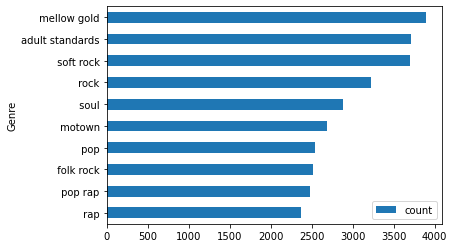

In [6]:
import matplotlib.pyplot as plt
dict_df.sort_values('count', ascending=False).head(10).plot.barh(x='Genre', y ='count')
plt.gca().invert_yaxis()